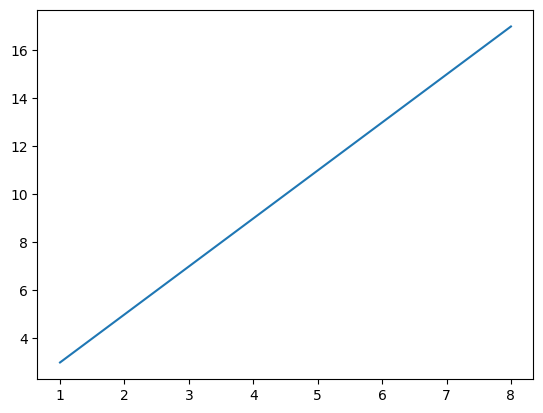

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1.0],[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[8.0]], dtype='float')
y = np.array([[3.0],[5.0],[7.0],[9.0],[11.0],[13.0],[15.0],[17.0]], dtype='float')

plt.plot(X,y)

In [2]:
# Initialize Model
model =  LinearRegression()
model.fit(X, y)

test_array = np.array([[9.0],[10.0],[11.0]], dtype='float')

model.predict(test_array)

model.coef_, model.intercept_


(array([[2.]]), array([1.]))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

In [4]:
X,y= fetch_california_housing(return_X_y=True)
type(X),type(y)
X.shape, y.shape

((20640, 8), (20640,))

In [5]:
#Function to reterive data from data path 
import urllib.request 

data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/housing.csv'

def download_read_data(path):
    ## Only retrieve the directory of the data

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(path)
    
    return data

In [6]:
cal_data = download_read_data(data_path)

In [8]:
cal_data.head()
cal_data.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [9]:
cal_data.info()
len(cal_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


10

In [19]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(cal_data, test_size=0.1, random_state=42)


In [20]:
print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))


The size of training data is: 18576 
The size of testing data is: 2064


In [21]:
#copy training data 
cal_train = train_data.copy()

In [22]:
train_data.describe(include='all')
train_data.describe(include='all').transpose()

count unique        top  freq           mean  \
longitude           18576.0    NaN        NaN   NaN    -119.575033   
latitude            18576.0    NaN        NaN   NaN      35.636918   
housing_median_age  18576.0    NaN        NaN   NaN      28.611488   
total_rooms         18576.0    NaN        NaN   NaN    2637.706126   
total_bedrooms      18576.0    NaN        NaN   NaN     537.863211   
population          18576.0    NaN        NaN   NaN    1427.055879   
households          18576.0    NaN        NaN   NaN     499.649763   
median_income       18576.0    NaN        NaN   NaN       3.872836   
median_house_value  18576.0    NaN        NaN   NaN  206861.739233   
ocean_proximity       18576      5  <1H OCEAN  8221            NaN   

                              std      min       25%       50%       75%  \
longitude                 2.00384  -124.35    -121.8    -118.5   -118.01   
latitude                 2.135052    32.55     33.93     34.26     37.72   
housing_median_age      12.596526      1.0      18.0      29.0      37.0   
total_rooms           2181.859884      2.0   1450.75    2127.0    3150.5   
total_bedrooms         419.157368      1.0     296.0     436.0     647.0   
population            1139.915138      3.0     787.0    1167.0    1726.0   
households             381.686386      1.0     280.0     410.0     605.0   
median_income            1.891866   0.4999    2.5643    3.5433    4.7569   
median_house_value  115386.011008  14999.0  119700.0  179650.0  264900.0   
ocean_proximity               NaN      NaN       NaN       NaN       NaN   

                         max  
longitude            -114.31  
latitude               41.95  
housing_median_age      52.0  
total_rooms          39320.0  
total_bedrooms        6445.0  
population           35682.0  
households            6082.0  
median_income        15.0001  
median_house_value  500001.0  
ocean_proximity          NaN

In [23]:
#check missing values 
train_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [24]:
print('The Percentage of missing values in total_bedrooms is: {}%'.format(train_data.isnull().sum()['total_bedrooms'] / len(train_data) * 100))

The Percentage of missing values in total_bedrooms is: 0.0%


In [31]:
train_data['ocean_proximity'].value_counts

<bound method IndexOpsMixin.value_counts of 5564     <1H OCEAN
16016     NEAR BAY
17131     NEAR BAY
11752       INLAND
2308        INLAND
           ...    
11284    <1H OCEAN
11964       INLAND
5390     <1H OCEAN
860      <1H OCEAN
15795     NEAR BAY
Name: ocean_proximity, Length: 18576, dtype: object>

<Axes: xlabel='ocean_proximity', ylabel='count'>

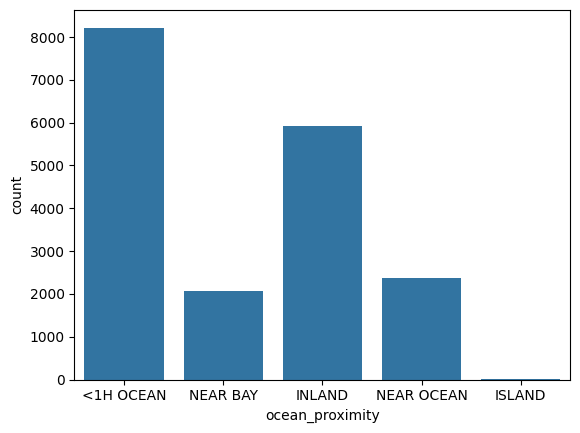

In [32]:
sns.countplot(train_data,x='ocean_proximity')

__Correlation__ is a statistical measure that quantifies the strength and direction of the linear relationship between two variables.

This measure is represented by the correlation coefficient, which can range from -1 to 1.

A value of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases proportionally.

A value of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases proportionally.

A value of 0 indicates no linear correlation, meaning that there is no predictable linear relationship between the changes in the two variables

In [40]:
correlation = train_data.corr(numeric_only=True)
correlation['median_house_value']


longitude            -0.047552
latitude             -0.142503
housing_median_age    0.105493
total_rooms           0.135327
total_bedrooms        0.050577
population           -0.023859
households            0.065760
median_income         0.689782
median_house_value    1.000000
Name: median_house_value, dtype: float64

<Axes: >

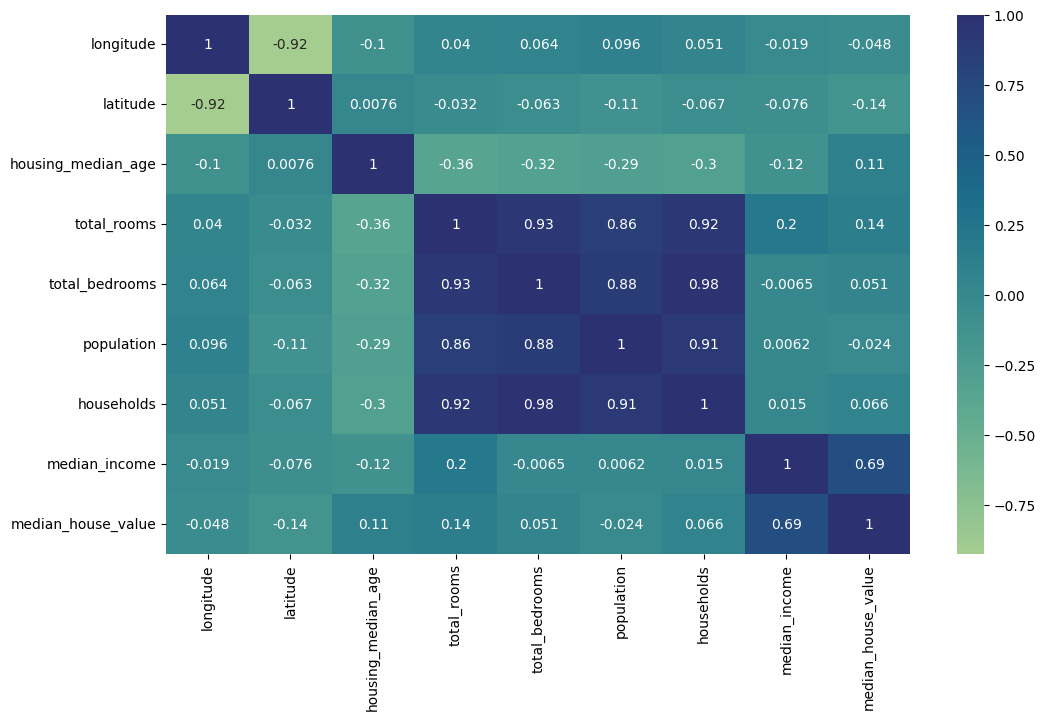

In [41]:
#### Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='crest')

Image of California -

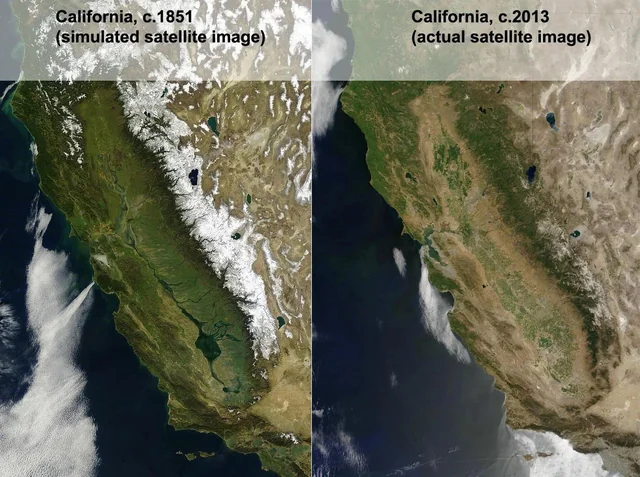

<Axes: xlabel='longitude', ylabel='latitude'>

<Figure size 1200x700 with 0 Axes>

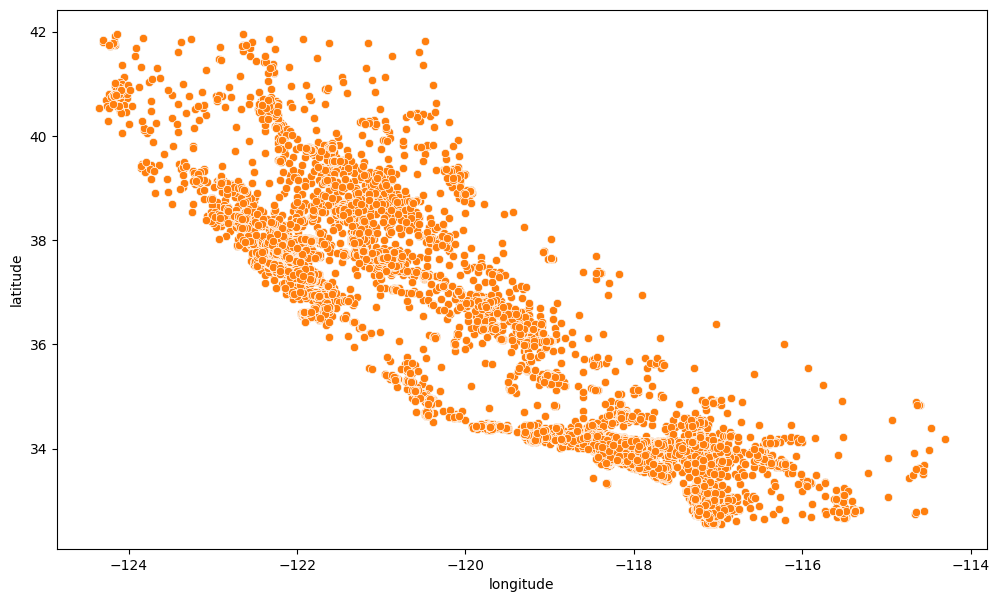

In [44]:
plt.figure(figsize=(12,7))

plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude')
sns.scatterplot(data = train_data, x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

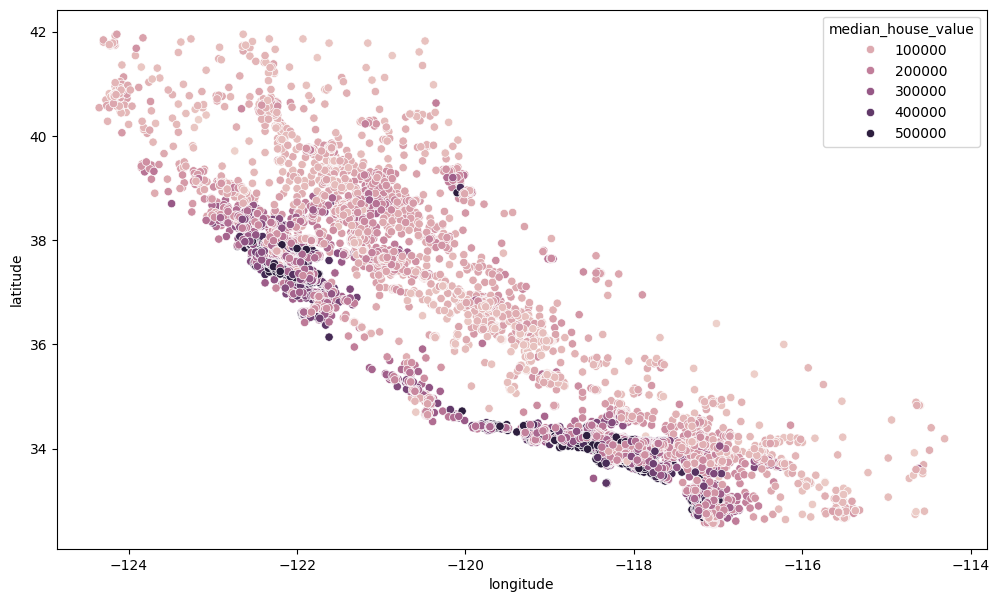

In [45]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='median_house_value')

<Axes: xlabel='longitude', ylabel='latitude'>

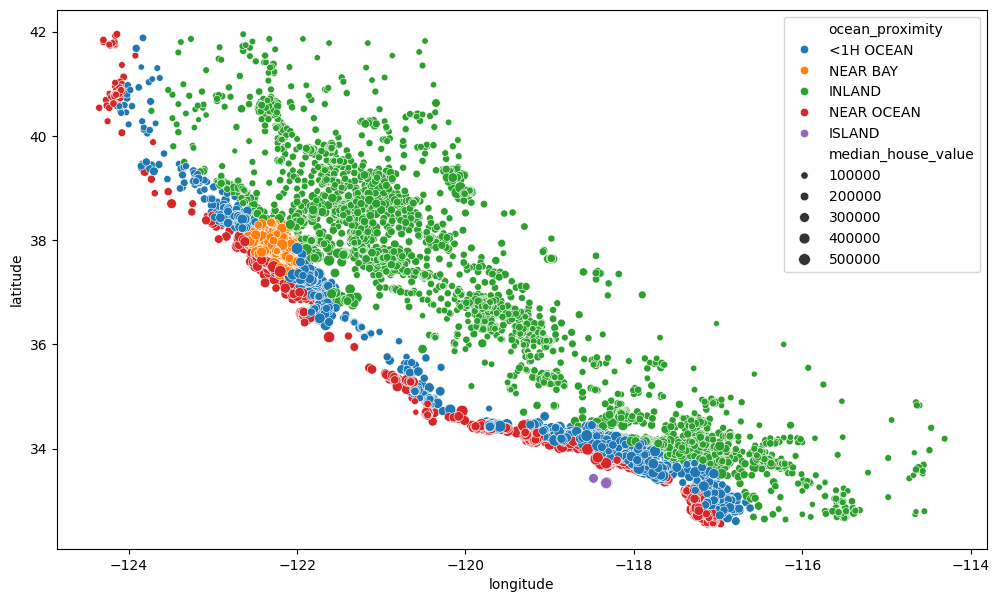

In [46]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='ocean_proximity', 
                size='median_house_value')

<Axes: xlabel='median_house_value', ylabel='median_income'>

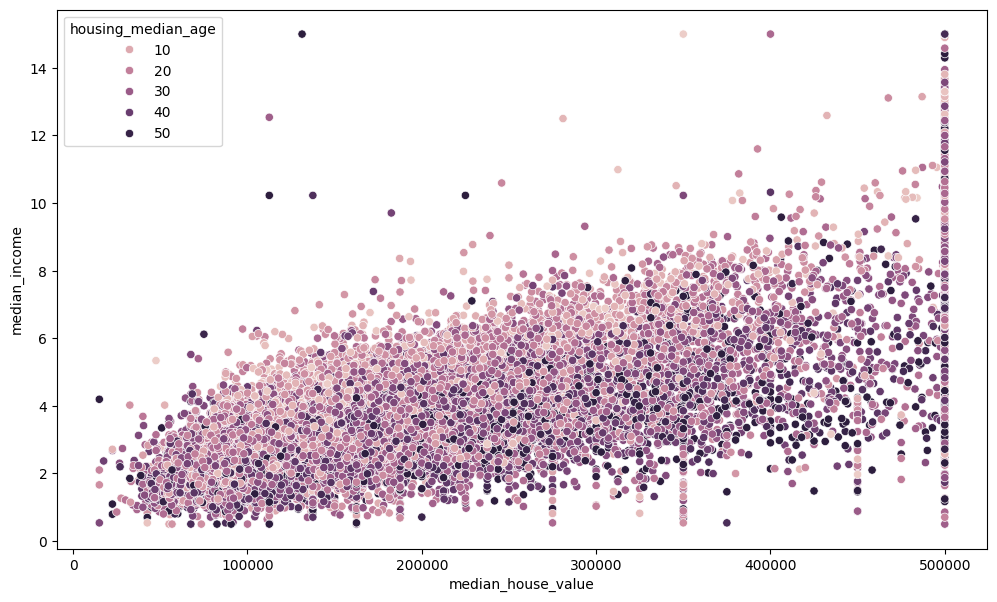

In [47]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='median_house_value', y='median_income', hue='housing_median_age')

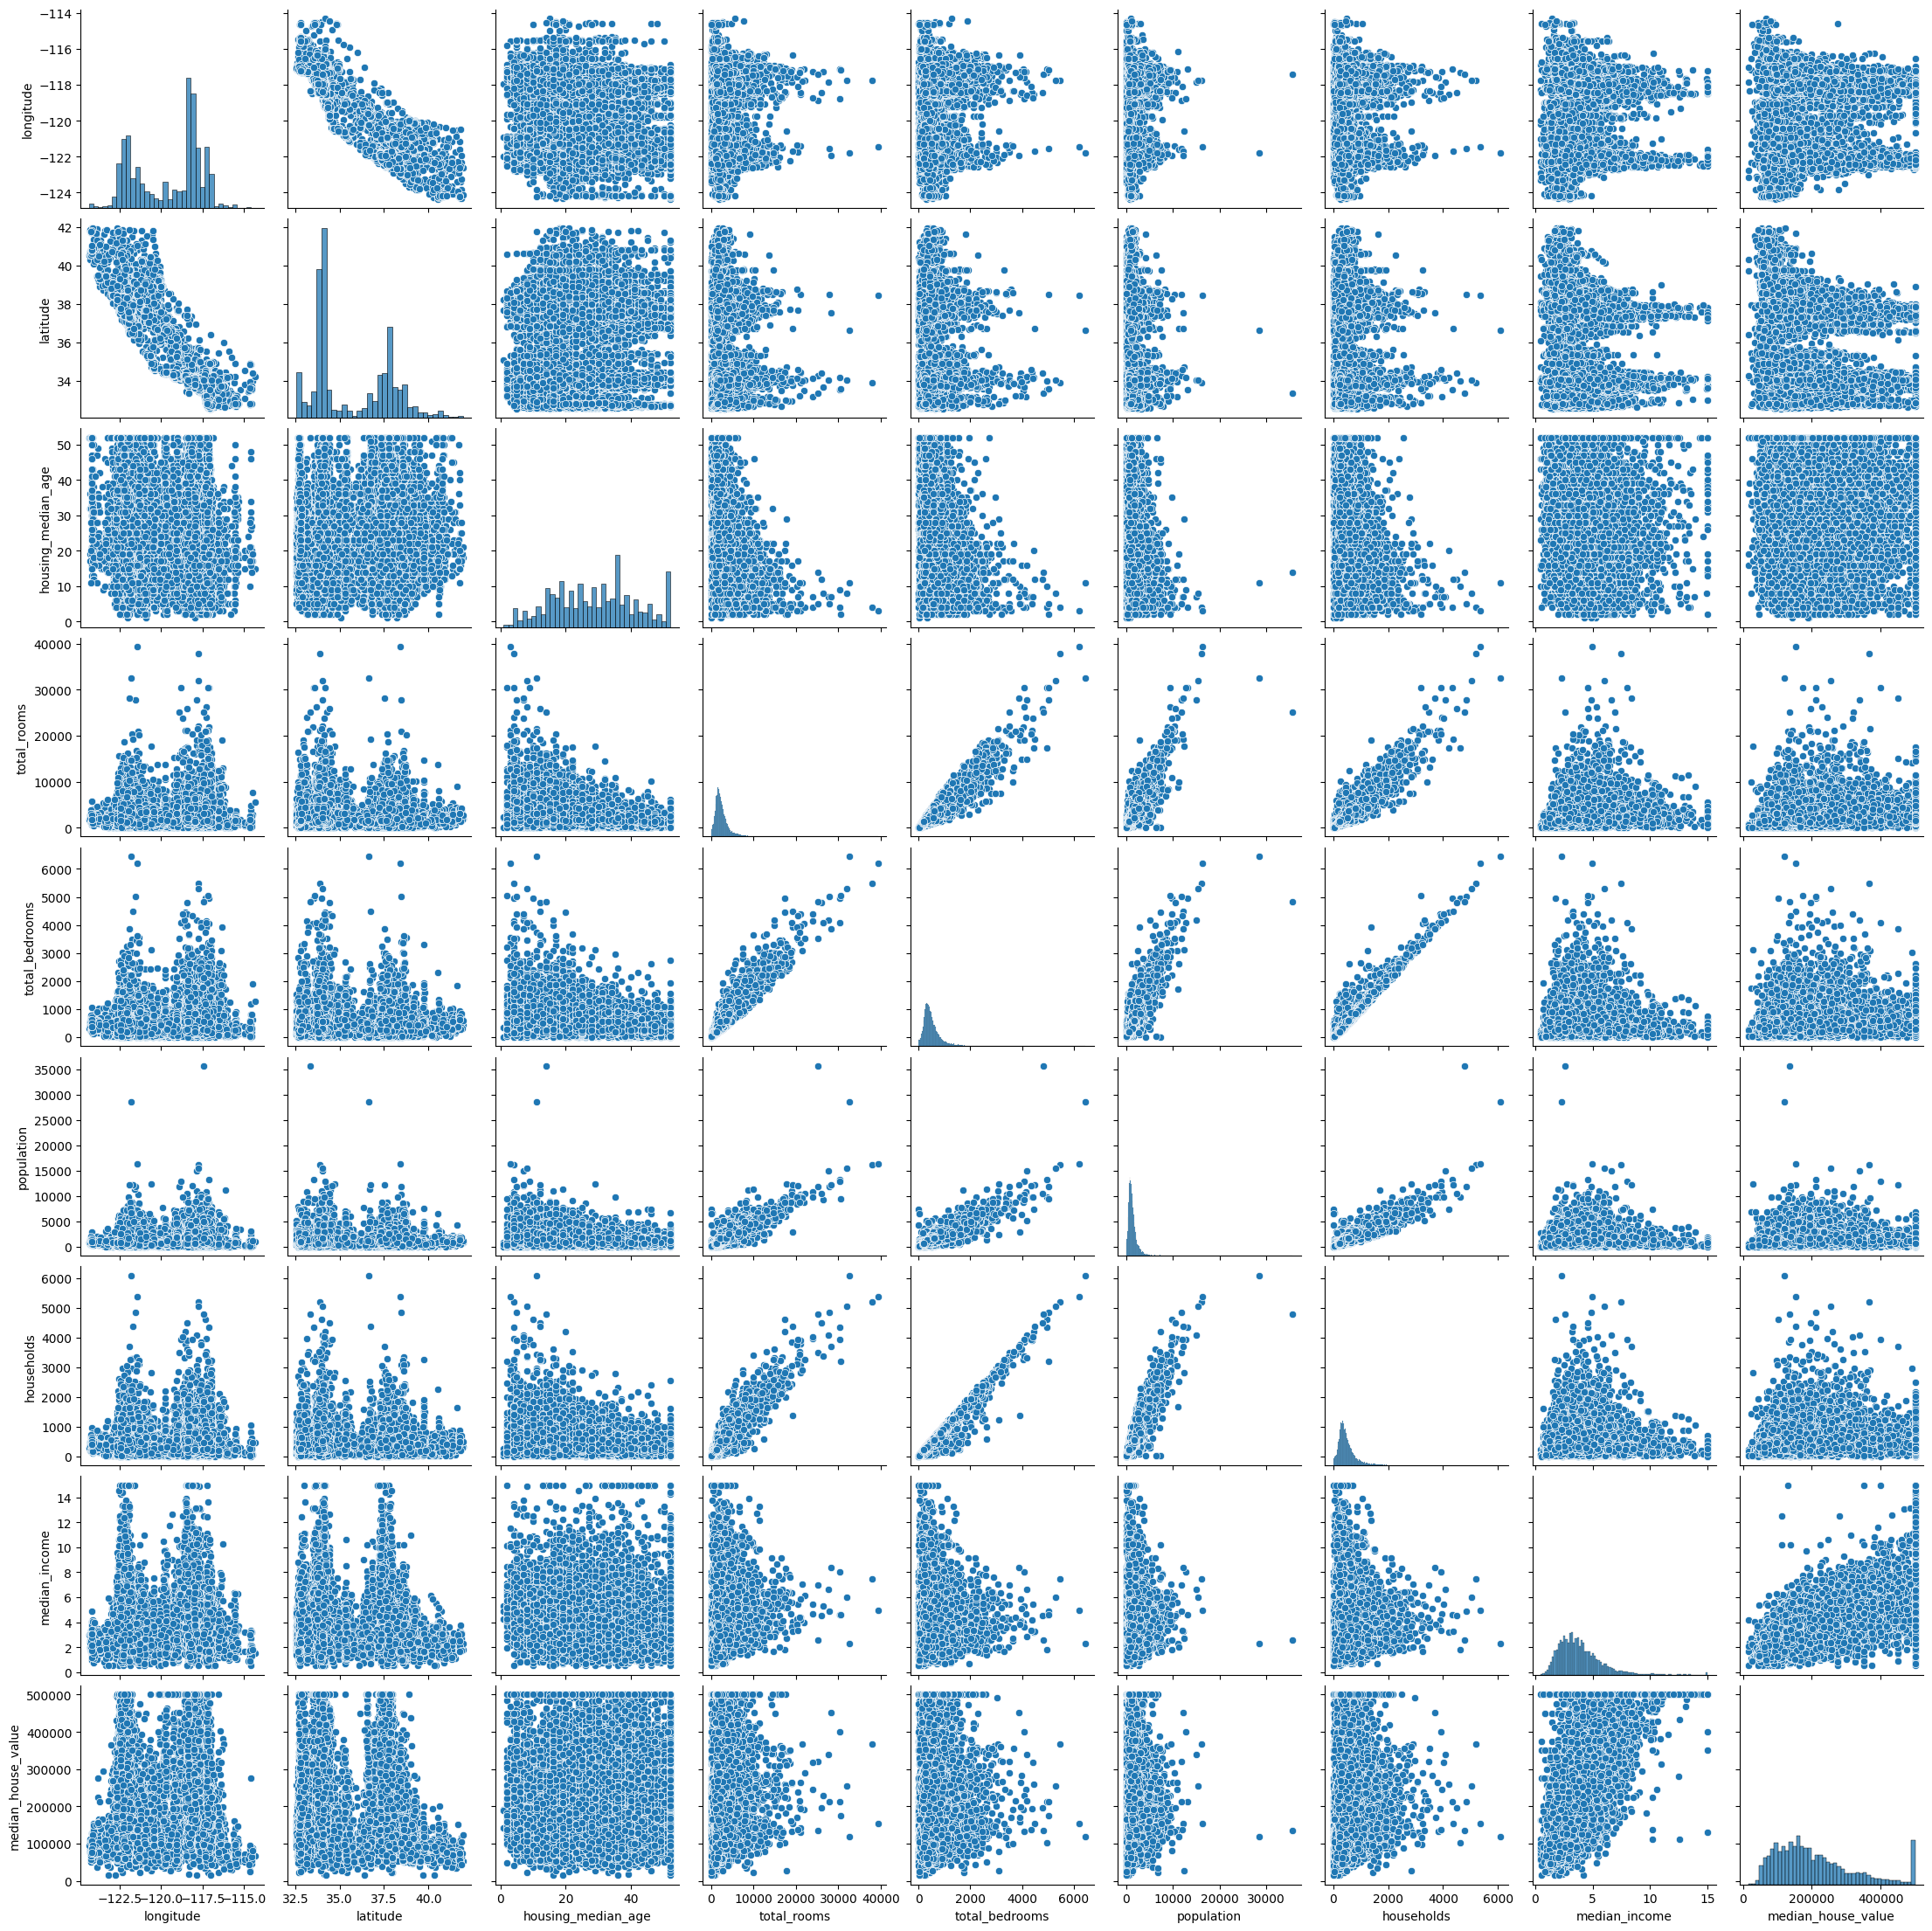

In [48]:
sns.pairplot(train_data)

In [49]:
train_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5564     -118.29     33.91                41.0       2475.0           532.0   
16016    -122.46     37.73                52.0       3547.0           506.0   
17131    -122.15     37.46                30.0       4198.0          1244.0   
11752    -121.21     38.76                16.0       1608.0           296.0   
2308     -119.75     36.83                15.0       2793.0           436.0   
...          ...       ...                 ...          ...             ...   
11284    -117.96     33.78                35.0       1330.0           201.0   
11964    -117.43     34.02                33.0       3084.0           570.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15795    -122.42     37.77                52.0       4226.0          1315.0   

       population  households  median_income  median_house_value  \
5564       1416.0       470.0         3.8372            156400.0   
16016      1276.0       491.0         8.0069            426800.0   
17131      2678.0      1147.0         3.6712            308600.0   
11752       792.0       286.0         3.1583            239200.0   
2308       1411.0       441.0         4.9292            109400.0   
...           ...         ...            ...                 ...   
11284       658.0       217.0         6.3700            229200.0   
11964      1753.0       449.0         3.0500             97800.0   
5390       1756.0       527.0         2.9344            222100.0   
860        1777.0       559.0         5.7192            283500.0   
15795      2619.0      1242.0         2.5755            325000.0   

      ocean_proximity  
5564        <1H OCEAN  
16016        NEAR BAY  
17131        NEAR BAY  
11752          INLAND  
2308           INLAND  
...               ...  
11284       <1H OCEAN  
11964          INLAND  
5390        <1H OCEAN  
860         <1H OCEAN  
15795        NEAR BAY  

[18576 rows x 10 columns]

In [ ]:
training_input_data = train_data.drop('median_house_value', axis=1)
training_labels = train_data['median_house_value']

In [53]:
training_input_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5564     -118.29     33.91                41.0       2475.0           532.0   
16016    -122.46     37.73                52.0       3547.0           506.0   
17131    -122.15     37.46                30.0       4198.0          1244.0   
11752    -121.21     38.76                16.0       1608.0           296.0   
2308     -119.75     36.83                15.0       2793.0           436.0   

       population  households  median_income ocean_proximity  
5564       1416.0       470.0         3.8372       <1H OCEAN  
16016      1276.0       491.0         8.0069        NEAR BAY  
17131      2678.0      1147.0         3.6712        NEAR BAY  
11752       792.0       286.0         3.1583          INLAND  
2308       1411.0       441.0         4.9292          INLAND

In [62]:
training_labels.head(3)


5564     156400.0
16016    426800.0
17131    308600.0
Name: median_house_value, dtype: float64

In [63]:
from sklearn.impute import SimpleImputer
num_feats = training_input_data.drop('ocean_proximity', axis=1)


In [64]:
# Function creation for handling missing values 
def handle_missing_values(input_data):
  """
  Docstring 

  # This is a function to take numerical features...
  ...and impute the missing values
  # We are filling missing values with mean
  # fit_transform fit the imputer on input data and transform it immediately
  # You can use fit(input_data) and then transform(input_data) or
  # Or do it at once with fit.transform(input_data)
  # Imputer returns the imputed data as a NumPy array 
  # We will convert it back to Pandas dataframe

  """
  mean_imputer = SimpleImputer(strategy='mean')
  num_feats_imputed = mean_imputer.fit_transform(input_data)
  num_feats_imputed = pd.DataFrame(num_feats_imputed, 
                            columns=input_data.columns, index=input_data.index )


  return num_feats_imputed

In [65]:
num_feats_imputed = handle_missing_values(num_feats)
num_feats_imputed.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### Encoding Categorical features

#### Mapping

In [66]:
training_input_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8221
INLAND        5913
NEAR OCEAN    2366
NEAR BAY      2071
ISLAND           5
Name: count, dtype: int64

In [67]:
cat_feats = training_input_data['ocean_proximity']
cat_feats.value_counts()

ocean_proximity
<1H OCEAN     8221
INLAND        5913
NEAR OCEAN    2366
NEAR BAY      2071
ISLAND           5
Name: count, dtype: int64

In [69]:
# creation of feature mapping
feat_map = {
      '<1H OCEAN': 0,
      'INLAND': 1,
      'NEAR OCEAN': 2,
      'NEAR BAY': 3, 
      'ISLAND': 4
}

cat_feats_encoded = cat_feats.map(feat_map)
cat_feats_encoded.head()

5564     0
16016    3
17131    3
11752    1
2308     1
Name: ocean_proximity, dtype: int64

#### Ordinal Encoding

In [76]:
from sklearn.preprocessing import OrdinalEncoder

def ordinary_encoder(input_data):
  
  encoder = OrdinalEncoder()
  
  output = encoder.fit_transform(input_data)

  return output

In [80]:
cat_feats.shape

(18576,)

In [83]:
# cat_feats_enc = ordinary_encoder(cat_feats.to_frame())
# or 
cat_feats_enc = ordinary_encoder(cat_feats.values.reshape(-1,1))
cat_feats_enc

array([[0.],
       [3.],
       [3.],
       ...,
       [0.],
       [0.],
       [3.]], shape=(18576, 1))